In [57]:
import h5py
import numpy as np
from atommic.collections.reconstruction.metrics.reconstruction_metrics import ssim,psnr,haarpsi3d,vsi3d
%matplotlib inline

In [58]:
Patient_id = "MTR_052"
intermidiate_form = "loglike"
fname = f'/data/projects/utwente/recon/SKM-TEA/v1-release/predictions/MTLRS_SENSE/predictions_8x/MTLRS_SKMTEA_LOGIT_TAM_DEF_2/2024-06-02_21-02-20/predictions/{Patient_id}.h5'
with h5py.File(fname, "r") as f:
    reconstruction_mtlrs_1 = f['reconstruction'][()].squeeze()
    prediction_mtlrs_1 = f['segmentation'][()].squeeze()
    target_mtlrs_1 = f['target_reconstruction'][()].squeeze()
    segmentation_labels_mtlrs_1 = f['target_segmentation'][()].squeeze()
    inter_loglike_mtlrs_1 = f['intermediate_loglike'][()].squeeze()
    inter_pred_mtlrs_1 = f['intermediate_reconstruction'][()].squeeze()
    zero_filled_mtlrs_1 = f['zero_filled'][()].squeeze()
fname = f'/data/projects/utwente/recon/SKM-TEA/v1-release/predictions/MTLRS_SENSE/predictions_8x/MTLRS_SKMTEA_LOGIT_TAM_DEF_2/2024-06-02_21-02-23/predictions/{Patient_id}.h5'
with h5py.File(fname, "r") as f:
    reconstruction_mtlrs_2 = f['reconstruction'][()].squeeze()
    prediction_mtlrs_2 = f['segmentation'][()].squeeze()
    inter_loglike_mtlrs_2 = f['intermediate_loglike'][()].squeeze()
    inter_pred_mtlrs_2 = f['intermediate_reconstruction'][()].squeeze()
    zero_filled_mtlrs_2 = f['zero_filled'][()].squeeze()
fname = f'/data/projects/utwente/recon/SKM-TEA/v1-release/predictions/MTLRS_SENSE/predictions_8x/MTLRS_SKMTEA_LOGIT_TAM_DEF_2/2024-06-02_21-02-30/predictions/{Patient_id}.h5'
with h5py.File(fname, "r") as f:
    reconstruction_mtlrs_3 = f['reconstruction'][()].squeeze()
    prediction_mtlrs_3 = f['segmentation'][()].squeeze()
    inter_loglike_mtlrs_3 = f['intermediate_loglike'][()].squeeze()
    inter_pred_mtlrs_3 = f['intermediate_reconstruction'][()].squeeze()
    zero_filled_mtlrs_3 = f['zero_filled'][()].squeeze()


In [61]:
echo=0
print(np.max(np.abs(target_mtlrs_1)))
print(np.max(np.abs(reconstruction_mtlrs_1)))
reconstruction_mtlrs_1_mag =np.abs(reconstruction_mtlrs_1)
target_mtlrs_1_mag = np.abs(target_mtlrs_1)
#maxvalue = max(np.max(reconstruction_mtlrs_1_mag), np.max(target_mtlrs_1_mag))
ssim_score_mag = ssim(target_mtlrs_1_mag[:,echo],reconstruction_mtlrs_1_mag[:,echo])

reconstruction_mtlrs_1_mag_norm =np.abs(reconstruction_mtlrs_1)/np.max(np.abs(reconstruction_mtlrs_1))
target_mtlrs_1_mag_norm = np.abs(target_mtlrs_1)/np.max(np.abs(target_mtlrs_1))
#maxvalue = max(np.max(reconstruction_mtlrs_1_mag_norm), np.max(target_mtlrs_1_mag_norm))
ssim_score_mag_norm = ssim(target_mtlrs_1_mag_norm[:,echo],reconstruction_mtlrs_1_mag_norm[:,echo])

print("Magnitude: ",ssim_score_mag,f"Magnitude Norm:",ssim_score_mag_norm)

slice_score_mag = np.zeros(80)
slice_score_mag_norm = np.zeros(80)
for i in range(target_mtlrs_1.shape[0]):
    reconstruction_mtlrs_1_mag =np.abs(reconstruction_mtlrs_1[i,echo])
    target_mtlrs_1_mag = np.abs(target_mtlrs_1[i,echo])
    #maxvalue = max(np.max(reconstruction_mtlrs_1_mag)-np.min(reconstruction_mtlrs_1_mag), np.max(target_mtlrs_1_mag)-np.min(target_mtlrs_1_mag))
    slice_score_mag[i] = ssim(target_mtlrs_1_mag,reconstruction_mtlrs_1_mag)
    reconstruction_mtlrs_1_mag_norm =np.abs(reconstruction_mtlrs_1[i,echo])/np.max(np.abs(reconstruction_mtlrs_1[i,echo]))
    target_mtlrs_1_mag_norm = np.abs(target_mtlrs_1[i,echo])/np.max(np.abs(target_mtlrs_1[i,echo]))
    #maxvalue = max(np.max(reconstruction_mtlrs_1_mag_norm), np.max(target_mtlrs_1_mag_norm))
    slice_score_mag_norm[i] = ssim(target_mtlrs_1_mag_norm,reconstruction_mtlrs_1_mag_norm)

print("Mean Slice Magnitude: ",np.mean(slice_score_mag),f"Mean Slice Magnitude Norm:", np.mean(slice_score_mag_norm))




1.000174
1.4876058
Magnitude:  0.8137461119775966 Magnitude Norm: 0.6386333280724841
Mean Slice Magnitude:  0.7418511146122594 Mean Slice Magnitude Norm: 0.7643231832196911


In [45]:
IP=2
inter_pred_mtlrs_1_pred = inter_pred_mtlrs_1[:,0,IP]
inter_pred_mtlrs_1_pred_mag =np.abs(inter_pred_mtlrs_1_pred)
target_mtlrs_1_mag = np.abs(target_mtlrs_1)
#maxvalue = max(np.max(inter_pred_mtlrs_1_pred_mag), np.max(target_mtlrs_1_mag))
ssim_score_mag = ssim(target_mtlrs_1_mag[:,echo],inter_pred_mtlrs_1_pred_mag[:,echo])

inter_pred_mtlrs_1_pred_mag_norm =np.abs(inter_pred_mtlrs_1_pred)/np.max(np.abs(inter_pred_mtlrs_1_pred))
target_mtlrs_1_mag_norm = np.abs(target_mtlrs_1)/np.max(np.abs(target_mtlrs_1))
#maxvalue = max(np.max(inter_pred_mtlrs_1_pred_mag_norm), np.max(target_mtlrs_1_mag_norm))
ssim_score_mag_norm = ssim(target_mtlrs_1_mag_norm[:,echo],inter_pred_mtlrs_1_pred_mag_norm[:,echo])
print("IP Magnitude: ",ssim_score_mag,f"IP Magnitude Norm:",ssim_score_mag_norm)


IP Magnitude:  0.8195378584572537 IP Magnitude Norm: 0.636041723509823


In [50]:
from typing import Sequence
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
def plot_images(
        images, processor=None, disable_ticks=True, titles: Sequence[str] = None,
        ylabel: str = None, xlabels: Sequence[str] = None, cmap: str = "gray",
        show_cbar: bool = False, overlay=None, opacity: float = 0.4,
        hsize=5, wsize=5, axs=None, fontsize=20,text=None,show_cbar_overlay: bool=False,ticks_overlay:bool=False,ticks:bool=False,
):
    """Plot multiple images in a single row.

    Add an overlay with the `overlay=` argument.
    Add a colorbar with `show_cbar=True`.
    """

    def get_default_values(x, default=""):
        if x is None:
            return [default] * len(images)
        return x

    titles = get_default_values(titles)
    ylabels = get_default_values(images)
    xlabels = get_default_values(xlabels)

    N = len(images)
    if axs is None:
        fig, axs = plt.subplots(1, N, figsize=(wsize * N, hsize))
    else:
        assert len(axs) >= N
        fig = axs.flatten()[0].get_figure()
    k = 0
    for ax, img, title, xlabel in zip(axs, images, titles, xlabels):
        if processor is not None:
            img = processor(img)
        if type(cmap) == list:
            if cmap[k] =='viridis' or cmap[k] =='jet' :
                im = ax.imshow(img, cmap=cmap[k],vmax=ticks[-1],vmin=ticks[0])
            else:
                im = ax.imshow(img, cmap=cmap[k])
            if type(show_cbar) == list:
                if show_cbar[k]:
                    fig.subplots_adjust(bottom=0.2)
                    cbar_ax = fig.add_axes([0.2, 0.1, 0.6, 0.01])
                    fig.colorbar(im, cax=cbar_ax)
        else:
            im = ax.imshow(img, cmap=cmap)
        k = k + 1
        ax.set_title(title, fontsize=fontsize)
        ax.set_xlabel(xlabel)

    if type(overlay) == list:
        for i, ax in enumerate(axs.flatten()):
            if overlay[i] is not None:
                im = ax.imshow(overlay[i], alpha=opacity,cmap='jet',vmax=ticks_overlay[-1],vmin=ticks_overlay[0])
                if type(show_cbar_overlay) == list:
                    if show_cbar_overlay[i]:
                        cbaxes = inset_axes(ax, width="30%", height="5%")
                        cbar = fig.colorbar(im,cax=cbaxes, orientation='horizontal',cmap='jet',ticks=ticks_overlay)
                        cbar.ax.set_xticklabels(labels= ticks_overlay,color='yellow',fontsize=fontsize)

    if type(text) == list:
        for i, ax in enumerate(axs.flatten()):
            if text[i] is not None:
               im = ax.text(.99, .99, text[i], ha='right', va='top', transform=ax.transAxes,fontsize=fontsize,color='yellow')

    if disable_ticks:
        for ax in axs.flatten():
            ax.get_xaxis().set_ticks([])
            ax.get_yaxis().set_ticks([])

    return axs


In [54]:
std_loglike_inter_1 = np.std([np.abs(inter_loglike_mtlrs_1[:,0]),np.abs(inter_loglike_mtlrs_2[:,0]),np.abs(inter_loglike_mtlrs_3[:,0])],axis=0)
std_loglike_inter_2 = np.abs(np.std([inter_loglike_mtlrs_1[:,0],inter_loglike_mtlrs_2[:,0],inter_loglike_mtlrs_3[:,0]],axis=0))

std_pred_inter_1 = np.std([np.abs(inter_pred_mtlrs_1[:,0]),np.abs(inter_pred_mtlrs_2[:,0]),np.abs(inter_pred_mtlrs_3[:,0])],axis=0)
std_pred_inter_2 = np.abs(np.std([inter_pred_mtlrs_1[:,0],inter_pred_mtlrs_2[:,0],inter_pred_mtlrs_3[:,0]],axis=0))


std_pred_inter = std_pred_inter_1
std_loglike_inter = std_loglike_inter_1

[atommic W 2024-06-06 13:26:25 atommic_logging:336] /scratch/tmpaquaij/Atommic/ATOMMIC_private/atommic/collections/reconstruction/losses/vsi.py:136: UserWarning: The original VSI supports only RGB images. The input images were converted to RGB by copying the grey channel 3 times.
      warnings.warn('The original VSI supports only RGB images. The input images were converted to RGB by copying '
    
[atommic W 2024-06-06 13:26:25 atommic_logging:336] /home/tmpaquaij/tmp/ipykernel_89368/2197371706.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
      plt.tight_layout(pad=0)
    


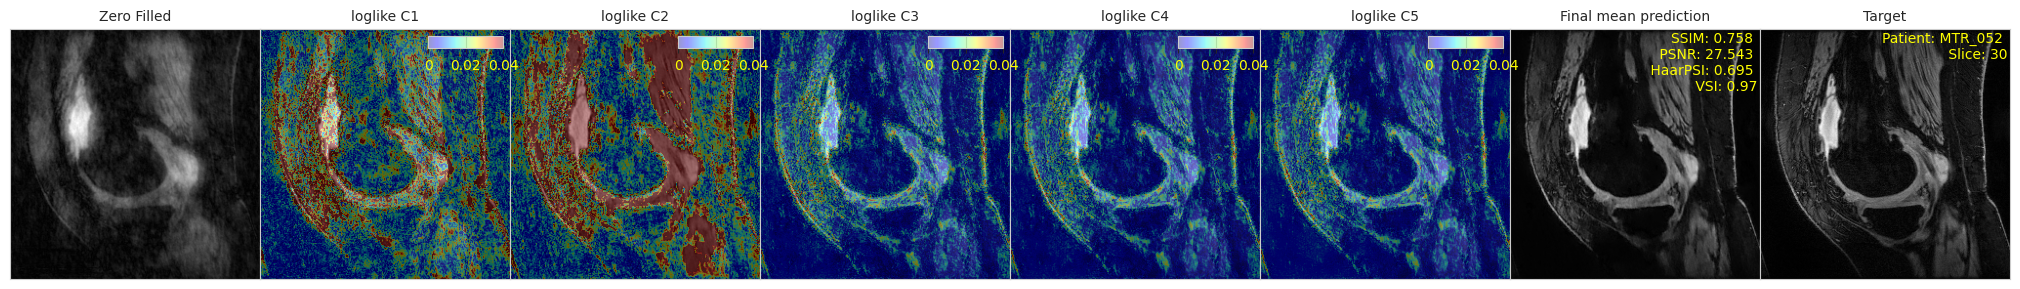

In [55]:
import matplotlib.pyplot as plt

mean_pred_inter = np.abs(np.mean([inter_pred_mtlrs_1[:,0],inter_pred_mtlrs_2[:,0],inter_pred_mtlrs_3[:,0]],axis=0))
zero_filled_mtlrs_1 = np.abs(zero_filled_mtlrs_1)
target_mtlrs_1 = np.abs(target_mtlrs_1)
mean_prediction = np.abs(np.mean([reconstruction_mtlrs_1,reconstruction_mtlrs_2,reconstruction_mtlrs_3],axis=0))

slice=30
hsize = 20
ticks_overlay = [0,0.02,0.04]
wsize = hsize / target_mtlrs_1.shape[2] * target_mtlrs_1.shape[3]
fontsize=10
fig, axs = plt.subplots(1, 8, figsize=(1 * wsize, 6 * hsize))
ssim_score = ssim(target_mtlrs_1[slice, echo], mean_prediction[slice, echo])
psnr_score = psnr(target_mtlrs_1[slice, echo], mean_prediction[slice, echo])
haarpsi_score = haarpsi3d(target_mtlrs_1[slice, echo], mean_prediction[slice, echo])
vsi_score = vsi3d(target_mtlrs_1[slice, echo], mean_prediction[slice, echo])

plot_images([zero_filled_mtlrs_1[slice, echo], mean_pred_inter[slice, 0, echo], mean_pred_inter[slice, 1, echo],
             mean_pred_inter[slice, 2, echo], mean_pred_inter[slice, 3, echo], mean_pred_inter[slice, 4, echo],
             mean_prediction[slice, echo], target_mtlrs_1[slice, echo]],
            titles=["Zero Filled", intermidiate_form + " C1", intermidiate_form + " C2",
                    intermidiate_form + " C3", intermidiate_form + " C4", intermidiate_form + " C5",
                    "Final mean prediction", "Target"], axs=axs,
            overlay=[None, std_pred_inter[slice, 0, echo], std_pred_inter[slice, 1, echo], std_pred_inter[slice, 2, echo],
                     std_pred_inter[slice, 3, echo], std_pred_inter[slice, 4, echo], None, None],
            show_cbar_overlay=[False, True, True, True, True, True, False, False], fontsize=fontsize,ticks_overlay=ticks_overlay,text=[None, None, None, None, None, None,
                                  f'SSIM: {round(ssim_score, 3)} \n PSNR: {round(psnr_score, 3)} \n HaarPSI: {round(haarpsi_score, 3)} \n VSI: {round(vsi_score, 3)}',
                                  f'Patient: {Patient_id} \n Slice: {slice}'],)
plt.tight_layout(pad=0)
plt.show()

[atommic W 2024-06-06 14:07:46 atommic_logging:336] /scratch/tmpaquaij/Atommic/ATOMMIC_private/atommic/collections/reconstruction/losses/vsi.py:136: UserWarning: The original VSI supports only RGB images. The input images were converted to RGB by copying the grey channel 3 times.
      warnings.warn('The original VSI supports only RGB images. The input images were converted to RGB by copying '
    
[atommic W 2024-06-06 14:07:47 atommic_logging:336] /home/tmpaquaij/tmp/ipykernel_89368/3027892080.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
      plt.tight_layout(pad=0)
    


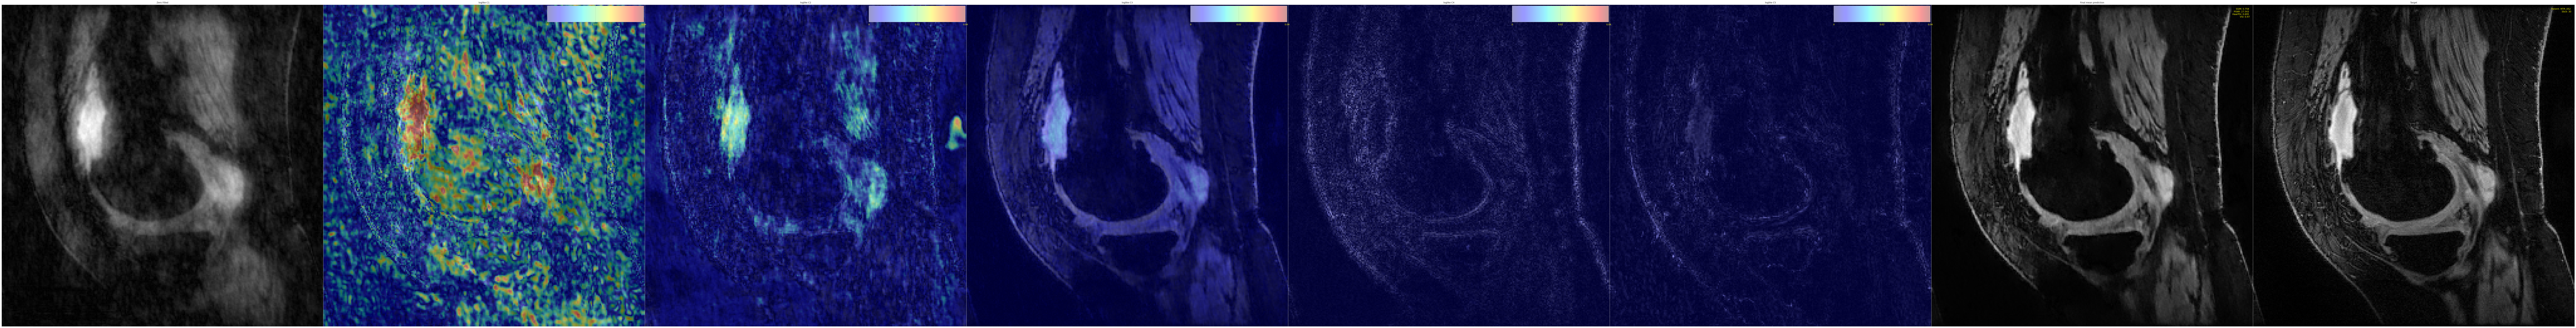

In [64]:
import matplotlib.pyplot as plt

mean_loglike_inter = np.abs(np.mean([inter_loglike_mtlrs_1[:,0],inter_loglike_mtlrs_2[:,0],inter_loglike_mtlrs_3[:,0]],axis=0))
zero_filled_mtlrs_1 = np.abs(zero_filled_mtlrs_1)
target_mtlrs_1 = np.abs(target_mtlrs_1)
mean_prediction = np.abs(np.mean([reconstruction_mtlrs_1,reconstruction_mtlrs_2,reconstruction_mtlrs_3],axis=0))

slice=30
hsize = 20
ticks_overlay = [0,0.02,0.04]
wsize = hsize / target_mtlrs_1.shape[2] * target_mtlrs_1.shape[3]
fontsize=10
fig, axs = plt.subplots(1, 8, figsize=(8 * wsize, 1 * hsize))
ssim_score = ssim(target_mtlrs_1[slice, echo], mean_prediction[slice, echo])
psnr_score = psnr(target_mtlrs_1[slice, echo], mean_prediction[slice, echo])
haarpsi_score = haarpsi3d(target_mtlrs_1[slice, echo], mean_prediction[slice, echo])
vsi_score = vsi3d(target_mtlrs_1[slice, echo], mean_prediction[slice, echo])

plot_images([zero_filled_mtlrs_1[slice, echo], mean_loglike_inter[slice, 0, echo], mean_loglike_inter[slice, 1, echo],
             mean_loglike_inter[slice, 2, echo], mean_loglike_inter[slice, 3, echo], mean_loglike_inter[slice, 4, echo],
             mean_prediction[slice, echo], target_mtlrs_1[slice, echo]],
            titles=["Zero Filled", intermidiate_form + " C1", intermidiate_form + " C2",
                    intermidiate_form + " C3", intermidiate_form + " C4", intermidiate_form + " C5",
                    "Final mean prediction", "Target"], axs=axs,
            overlay=[None, std_loglike_inter[slice, 0, echo], std_loglike_inter[slice, 1, echo], std_loglike_inter[slice, 2, echo],
                     std_loglike_inter[slice, 3, echo], std_loglike_inter[slice, 4, echo], None, None],
            show_cbar_overlay=[False, True, True, True, True, True, False, False], fontsize=fontsize,ticks_overlay=ticks_overlay,text=[None, None, None, None, None, None,
                                  f'SSIM: {round(ssim_score, 3)} \n PSNR: {round(psnr_score, 3)} \n HaarPSI: {round(haarpsi_score, 3)} \n VSI: {round(vsi_score, 3)}',
                                  f'Patient: {Patient_id} \n Slice: {slice}'],)
plt.tight_layout(pad=0)
plt.savefig('/scratch/tmpaquaij/Figures/IP/test.png')